<a href="https://colab.research.google.com/github/NishaMDev/ML-Learning/blob/main/Assignment%235/ML_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Assignment - 5**

**Created On** March 6, 2022

***@Author : Nisha Devadiga : nishamohan.devadiga@sjsu.edu***

**Problem Statement**-  With the Soccer team information spanning from 2009 to 2019, below classification algorithm can predict which team (Home Team / Away Team) can win the match. 

For this problem statement, we have identified a new dataset that would serve the purpose.

In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder , MinMaxScaler , LabelEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

from sklearn import linear_model, tree, ensemble
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import time

In [62]:
game_url_2018_2019 ="https://datahub.io/sports-data/english-premier-league/r/0.csv"
game_url_2017_2018 = "https://datahub.io/sports-data/english-premier-league/r/1.csv"
game_url_2016_2017 = "https://datahub.io/sports-data/english-premier-league/r/2.csv"
game_url_2015_2016 = "https://datahub.io/sports-data/english-premier-league/r/3.csv"
game_url_2014_2015 = "https://datahub.io/sports-data/english-premier-league/r/4.csv"
game_url_2013_2014 = "https://datahub.io/sports-data/english-premier-league/r/5.csv"
game_url_2012_2013 = "https://datahub.io/sports-data/english-premier-league/r/6.csv"
game_url_2011_2012 = "https://datahub.io/sports-data/english-premier-league/r/7.csv"
game_url_2010_2011 = "https://datahub.io/sports-data/english-premier-league/r/8.csv"
game_url_2009_2010 = "https://datahub.io/sports-data/english-premier-league/r/9.csv"

In [63]:
data1 = pd.read_csv(game_url_2018_2019) 
data2 = pd.read_csv(game_url_2017_2018)
data3 = pd.read_csv(game_url_2016_2017)
data4 = pd.read_csv(game_url_2015_2016)
data5 = pd.read_csv(game_url_2014_2015)
data6 = pd.read_csv(game_url_2013_2014)
data7 = pd.read_csv(game_url_2012_2013)
data8 = pd.read_csv(game_url_2011_2012)
data9 = pd.read_csv(game_url_2010_2011)
data10 = pd.read_csv(game_url_2009_2010)

frames = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
data = pd.concat(frames,ignore_index=True)
data.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,E0,11/08/2018,Watford,Brighton,2,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,E0,11/08/2018,Wolves,Everton,2,2,D,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E0,12/08/2018,Arsenal,Man City,0,2,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,E0,12/08/2018,Liverpool,West Ham,4,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,E0,12/08/2018,Southampton,Burnley,0,0,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
data.index.is_unique

True

Check Shape of the data

In [65]:
data.shape

(3800, 77)

In [66]:
df = data[["FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS"]]


Check for missing values

In [67]:
df.isna().sum()

FTHG    0
FTAG    0
FTR     0
HTHG    0
HTAG    0
HTR     0
HS      0
AS      0
dtype: int64

Check Details for all numeric variables

In [68]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.570526,1.180000,0.691579,0.522368,14.181316,11.229211
std,1.322363,1.160788,0.838739,0.735319,5.514299,4.687029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000
max,9.000000,7.000000,5.000000,5.000000,43.000000,30.000000


Examine the columns, look at missing data and check Datatype of the Columns

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FTHG    3800 non-null   int64 
 1   FTAG    3800 non-null   int64 
 2   FTR     3800 non-null   object
 3   HTHG    3800 non-null   int64 
 4   HTAG    3800 non-null   int64 
 5   HTR     3800 non-null   object
 6   HS      3800 non-null   int64 
 7   AS      3800 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 237.6+ KB


Check if the Dataset is Balanced

In [70]:
df["FTR"].value_counts()

H    1758
A    1102
D     940
Name: FTR, dtype: int64

We can see the Data set is nor perfectly balanced at it leans towards the “Home” a bit more.

**Latent Variable# 1**

The Total Shots Ratio (TSR) is used to determine how well teams fare in a match when it comes to taking and conceding shots.

The TSR is determined by the following formula:

TSR = $\frac{Total shots for}{Total shots for + total shots against}$


In [71]:
df["TSR"] = df["HS"] / (df["HS"] + df["AS"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Latent Variable# 2**

Home Hit Rate is used to determines the rate at which home teams serves a goal against shots played.

The HHR is determined by the following formula:

Home Hit Rate = $\frac{Full Time Home Goal}{Home Shots}$

In [72]:
df["HHR"] = df["FTHG"]/df["HS"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Latent Variable# 3**

Away Hit Rate is used to determine the rate at which away teams serves a goal against shots played.

The AWR is determined by the following formula:

Away Hit Rate = $\frac{Full Time Away Goals}{Away Shots}$

In [73]:
df["AHR"] = df["FTAG"]/df["AS"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
df.drop(columns=["HS","AS"], inplace=True)
df;

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# **Univariate Analysis**

Count FTR (*Full Time Result*) for each outcome.

Text(0, 0.5, 'Count')

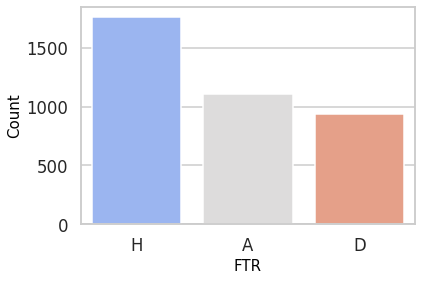

In [75]:
sns.set_context('talk', font_scale = 1)
sns.countplot(data=df,x="FTR",palette="coolwarm",)
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("Count",size=15,color="Black")

**Observations:**

1. Just By looking at the Counts we can get the Understanding that the Home team has Significantly more wins.
2. Another way of looking at is Away Team is more likely to get a Draw or a loss more often
3. Looking at this it looks like Playing at home is a big advantage.

In [76]:
df.index

RangeIndex(start=0, stop=3800, step=1)

**Probability Density Function(PDF)**

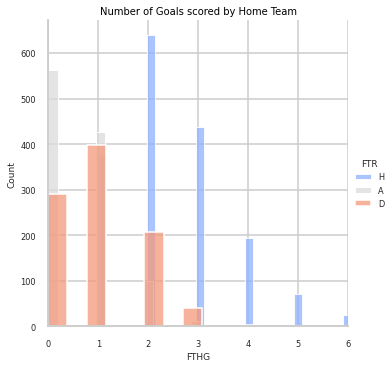

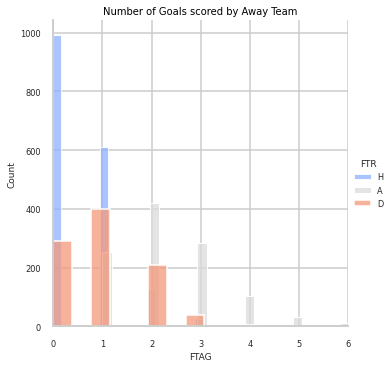

In [121]:
sns.FacetGrid(df,height=5,hue="FTR",palette="coolwarm",xlim=(0,6)) \
   .map(sns.histplot,"FTHG") \
   .add_legend()
plt.title("Number of Goals scored by Home Team",size=10,color= "Black")
plt.show()

sns.FacetGrid(df,height=5,hue="FTR",palette="coolwarm",xlim=(0,6)) \
   .map(sns.histplot,"FTAG") \
   .add_legend()
plt.title("Number of Goals scored by Away Team",size=10,color= "Black")
plt.show()

**Observations:**

1. Most of the times, Both Home and Away Team scores 1 goal, Frequent scores are (1,0,2 in this sequence).Away team slightly ahead here.
2. However, When it come to more than 2 goals, Home Teams are ahead.

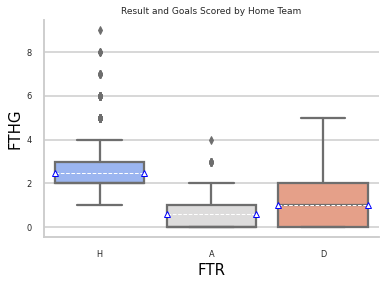

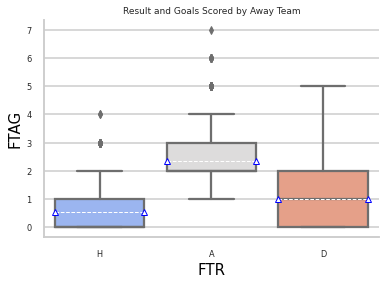

In [106]:

sns.boxplot(data=df,x="FTR",y="FTHG",palette="coolwarm", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
sns.despine()
plt.title("Result and Goals Scored by Home Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTHG",size=15,color="Black")
plt.show()

sns.boxplot(data=df,x="FTR",y="FTAG",palette="coolwarm", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
sns.despine()
plt.title("Result and Goals Scored by Away Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTAG",size=15,color="Black")
plt.show()

***Observations:***

**Home Team :**
1. While winning score mean of 2.5 Goals.
2. When Drawn mean is 0.9 Goals
3. When Lost Mean is 0.5 Goals

**Away Team :**

1. 1.While winning score mean of 2.1 Goals.
2. 2.When Drawn mean is 0.9 Goals.
3. When Lost Mean is 0.6 Goals
-> Overall Home Team is Scoring more goals, While will be a huge factor in winning the game.

# **Bi-Variate analysis**

Perform Pair Plot analysis to visualize the relationship between features.

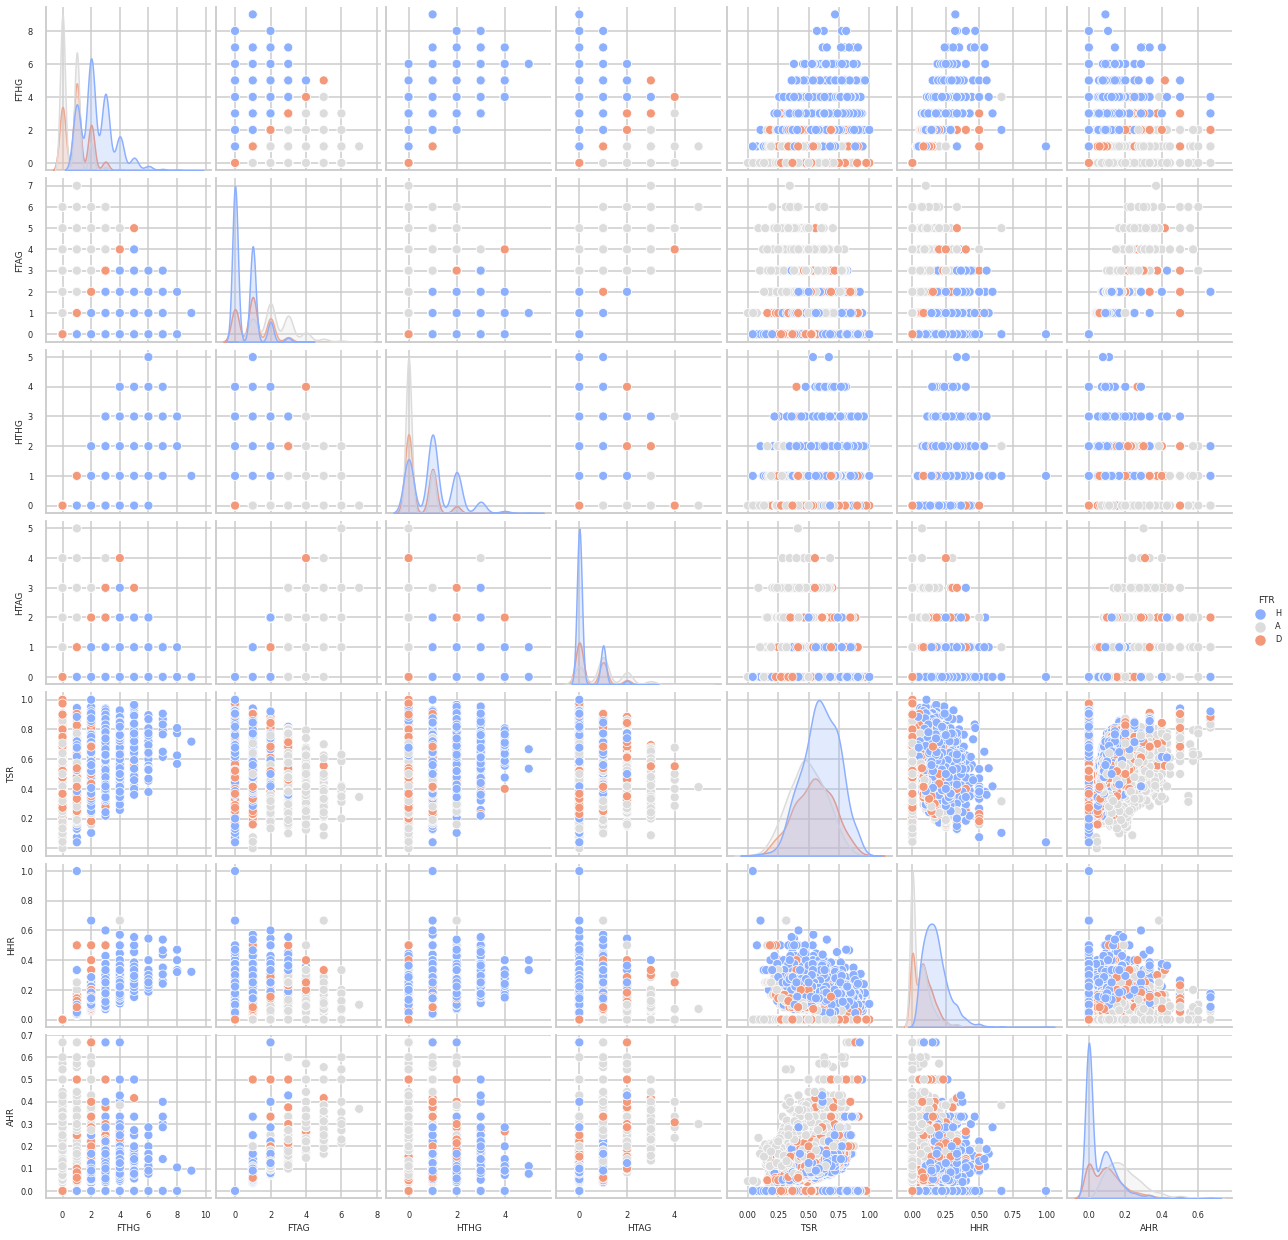

In [79]:
sns.pairplot(df,hue="FTR",palette="coolwarm")

**Observations:**

FTHG *(Full time Home Goal)* and FTAG *(Full time Away Goal)* are the values which clearly indicate who will win. 
So studying these 2 variables can be the best way to to predict FTR.

Whichever faeture has higher value that team wins which translates to the team which score more Goals at Full Time wins the match.

Basicall this is how football works.

Lets Visualize to check if a team is Winning at Half Time or does it Change at Full Time

Text(0, 0.5, 'Count')

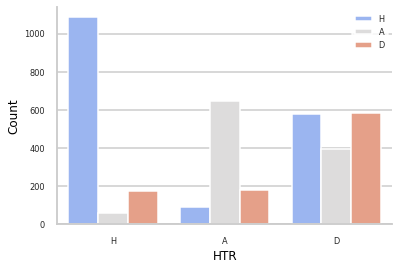

In [105]:
sns.countplot(data=df,x="HTR",hue="FTR",palette="coolwarm")
plt.legend(edgecolor="White",facecolor="White")
sns.despine()
plt.xlabel("HTR",size=12,color="Black")
plt.ylabel("Count",size=12,color="Black")


**Understanding:**


H : Shows the Home team leading at Half Time.

A : Shows the Away team leading at Half Time.

D : Shows the game was level at Half Time.

Blue Bar shows the team went on to Win.

Orange Bar shows the team went on and Drew the game.

Green Bar shows the team Lost the game at Full time.

**Observation:**


1. The team Leading at Half Time almost always goes on to win the game at Full time.

2. If the game is level at Half Time it is more likely Home team will win than the Away team. Although the most likely outcome is a Draw only.

3. So HTR is a very important variable to determine who wins at Full time.

**Conclusion**:

1. There is a Higher percentage of Home team winning, so clearly the team playing at Home has an advantage.
2. Goals Scored at Full time (FTHG - *Home Goals*, FTAG - *Away Goals*) determine FTR - *Full Time Result* i.e. which team will go on to win the game, team which score more Goals at FT wins the match.
3. The Home team usually score more goals. Ex While winning Home team score mean of 2.5 Goals as compared to 2.1 Goals by Away team while winning.
4. HTR (*Half Time Result*) is a very important variable to determine who wins at Full time. As we saw the Team winning at Half team does not usually end up Losing at Full time. So this Variable can effectively predict who is likely to win at full time.

#**Data Prepartion - Train and Test Dataset**

**Identify the catergorical and non-categorical features**

In [81]:
one_hot_encode_cols = df.dtypes[df.dtypes == object]
one_hot_encode_cols

FTR    object
HTR    object
dtype: object

In [82]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

,0,1,2,3,4
FTR,H,H,A,A,A
HTR,H,H,A,A,A


In [83]:
df

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,TSR,HHR,AHR
0,2,1,H,1,0,H,0.380952,0.250000,0.076923
1,2,0,H,1,0,H,0.545455,0.166667,0.000000
2,0,2,A,0,1,A,0.600000,0.000000,0.200000
3,0,3,A,0,2,A,0.315789,0.000000,0.230769
4,1,2,A,1,2,A,0.500000,0.066667,0.133333
...,...,...,...,...,...,...,...,...,...
3795,1,0,H,0,0,D,0.677419,0.047619,0.000000
3796,0,0,D,0,0,D,0.366667,0.000000,0.000000
3797,4,0,H,2,0,H,0.818182,0.222222,0.000000
3798,1,1,D,1,1,D,0.413793,0.083333,0.058824


Encode the target column - **FTR - Full Time Result** 

In [84]:
from sklearn.preprocessing import LabelEncoder

target_labelencoder = LabelEncoder()

df['target_cat'] = target_labelencoder.fit_transform(df['FTR'])

df.info

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<bound method DataFrame.info of       FTHG  FTAG FTR  HTHG  HTAG HTR       TSR       HHR       AHR  target_cat
0        2     1   H     1     0   H  0.380952  0.250000  0.076923           2
1        2     0   H     1     0   H  0.545455  0.166667  0.000000           2
2        0     2   A     0     1   A  0.600000  0.000000  0.200000           0
3        0     3   A     0     2   A  0.315789  0.000000  0.230769           0
4        1     2   A     1     2   A  0.500000  0.066667  0.133333           0
...    ...   ...  ..   ...   ...  ..       ...       ...       ...         ...
3795     1     0   H     0     0   D  0.677419  0.047619  0.000000           2
3796     0     0   D     0     0   D  0.366667  0.000000  0.000000           1
3797     4     0   H     2     0   H  0.818182  0.222222  0.000000           2
3798     1     1   D     1     1   D  0.413793  0.083333  0.058824           1
3799     2     1   H     1     1   D  0.560000  0.142857  0.090909           2

[3800 rows x 10 col

In [85]:
target_names = ['H','A','D']

Encode the categorical feature with OneHot Encoding and standarized the numerical features using MinMax Scaler.

In [86]:
categorical_features = ["HTR"]

numeric_features = ["FTHG","FTAG","HTHG","HTAG"]

y = df['target_cat'].values

X = df[categorical_features + numeric_features]

colum_transformer = ColumnTransformer([('numerical', MinMaxScaler(), numeric_features),('categorical', OneHotEncoder(), categorical_features),], remainder='passthrough')

X = colum_transformer.fit_transform(X)

print(X)

[[0.22222222 0.14285714 0.2        ... 0.         0.         1.        ]
 [0.22222222 0.         0.2        ... 0.         0.         1.        ]
 [0.         0.28571429 0.         ... 1.         0.         0.        ]
 ...
 [0.44444444 0.         0.4        ... 0.         0.         1.        ]
 [0.11111111 0.14285714 0.2        ... 0.         1.         0.        ]
 [0.22222222 0.14285714 0.2        ... 0.         1.         0.        ]]


In [87]:
feature_names = colum_transformer.get_feature_names_out()
feature_names 

array(['numerical__FTHG', 'numerical__FTAG', 'numerical__HTHG',
       'numerical__HTAG', 'categorical__HTR_A', 'categorical__HTR_D',
       'categorical__HTR_H'], dtype=object)

In [88]:
X.shape

(3800, 7)

In [89]:
y.shape

(3800,)

Split the dataset into training and test dataset.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# **Regression**

Implement **Muller Loop** to run the training dataset against - "MLPRegressor", "LinearRegression", "RandomForestRegressor","KNNRegressor", "LogisticRegression", "AdaBoost" and display their accuracy.

In [91]:
names = ["MLPRegressor", "LinearRegression", "RandomForestRegressor",
         "KNNRegressor", "LogisticRegression",
         "AdaBoost"]

classifiers = [
    MLPRegressor(random_state=1, max_iter=800),
    LinearRegression(),
    RandomForestRegressor(max_depth=2, random_state=0),
    KNeighborsRegressor(n_neighbors=2),
    LogisticRegression(),
    AdaBoostRegressor(random_state=0, n_estimators=100)]


max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append(score)
    clf_list.append(name)
    print('Regression  Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Regression Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Regression  Classifier = MLPRegressor, Score (test, accuracy) = 99.51, Training time = 1.94 seconds
Regression  Classifier = LinearRegression, Score (test, accuracy) = 74.78, Training time = 0.00 seconds
Regression  Classifier = RandomForestRegressor, Score (test, accuracy) = 75.75, Training time = 0.24 seconds
Regression  Classifier = KNNRegressor, Score (test, accuracy) = 99.24, Training time = 0.02 seconds
Regression  Classifier = LogisticRegression, Score (test, accuracy) = 96.12, Training time = 0.08 seconds
Regression  Classifier = AdaBoost, Score (test, accuracy) = 92.79, Training time = 0.29 seconds
--------------------------------------------------------------------------------
Best --> Regression Classifier = MLPRegressor, Score (test, accuracy) = 99.51


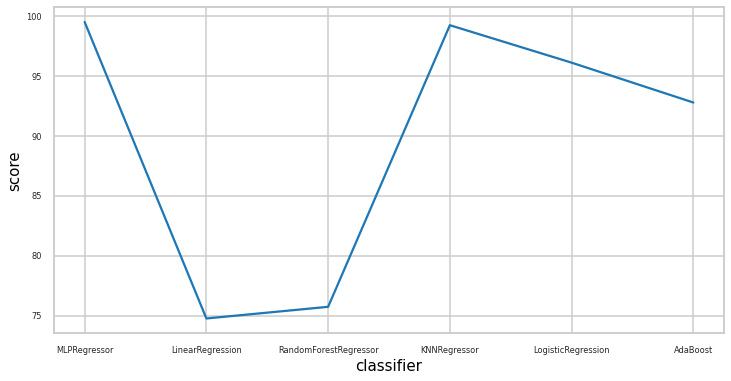

In [92]:
from IPython.core.pylabtools import figsize
from matplotlib import figure

plt.figure(figsize=(12,6))
plt.plot(clf_list,score_list)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black");

# **Classification - Single Model - Decision Tree**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [93]:
from sklearn import tree

decisionTree = tree.DecisionTreeClassifier()

decisionTree = decisionTree.fit(X,y)

[Text(0.36363636363636365, 0.9444444444444444, 'X[0] <= 0.167\ngini = 0.641\nsamples = 3800\nvalue = [1102, 940, 1758]'),
 Text(0.22727272727272727, 0.8333333333333334, 'X[1] <= 0.214\ngini = 0.622\nsamples = 2054\nvalue = [989, 688, 377]'),
 Text(0.18181818181818182, 0.7222222222222222, 'X[1] <= 0.071\ngini = 0.609\nsamples = 1318\nvalue = [253, 688, 377]'),
 Text(0.09090909090909091, 0.6111111111111112, 'X[0] <= 0.056\ngini = 0.491\nsamples = 667\nvalue = [0, 290, 377]'),
 Text(0.045454545454545456, 0.5, 'gini = 0.0\nsamples = 290\nvalue = [0, 290, 0]'),
 Text(0.13636363636363635, 0.5, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377]'),
 Text(0.2727272727272727, 0.6111111111111112, 'X[0] <= 0.056\ngini = 0.475\nsamples = 651\nvalue = [253, 398, 0]'),
 Text(0.22727272727272727, 0.5, 'gini = 0.0\nsamples = 253\nvalue = [253, 0, 0]'),
 Text(0.3181818181818182, 0.5, 'gini = 0.0\nsamples = 398\nvalue = [0, 398, 0]'),
 Text(0.2727272727272727, 0.7222222222222222, 'gini = 0.0\nsamples = 736\

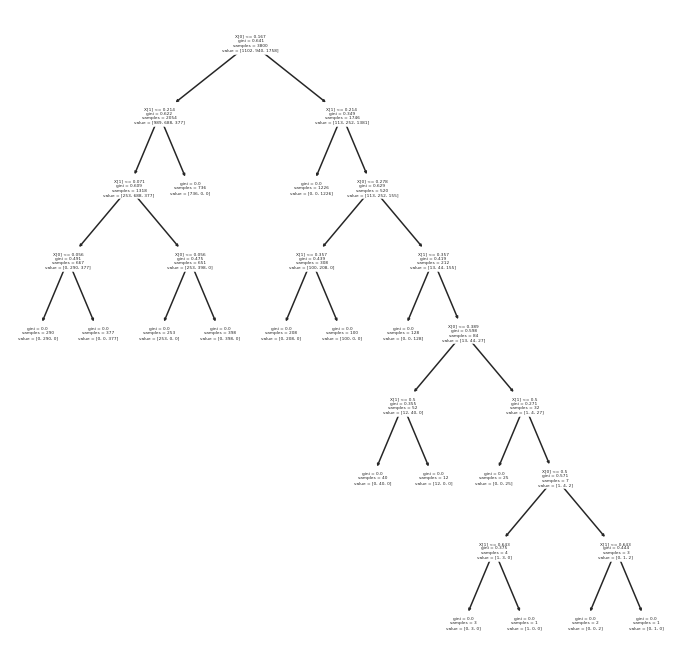

In [94]:
plt.figure(figsize=(12,12))
tree.plot_tree(decisionTree)

In [95]:
import graphviz 
dot_data = tree.export_graphviz(decisionTree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Football")

'Football.pdf'

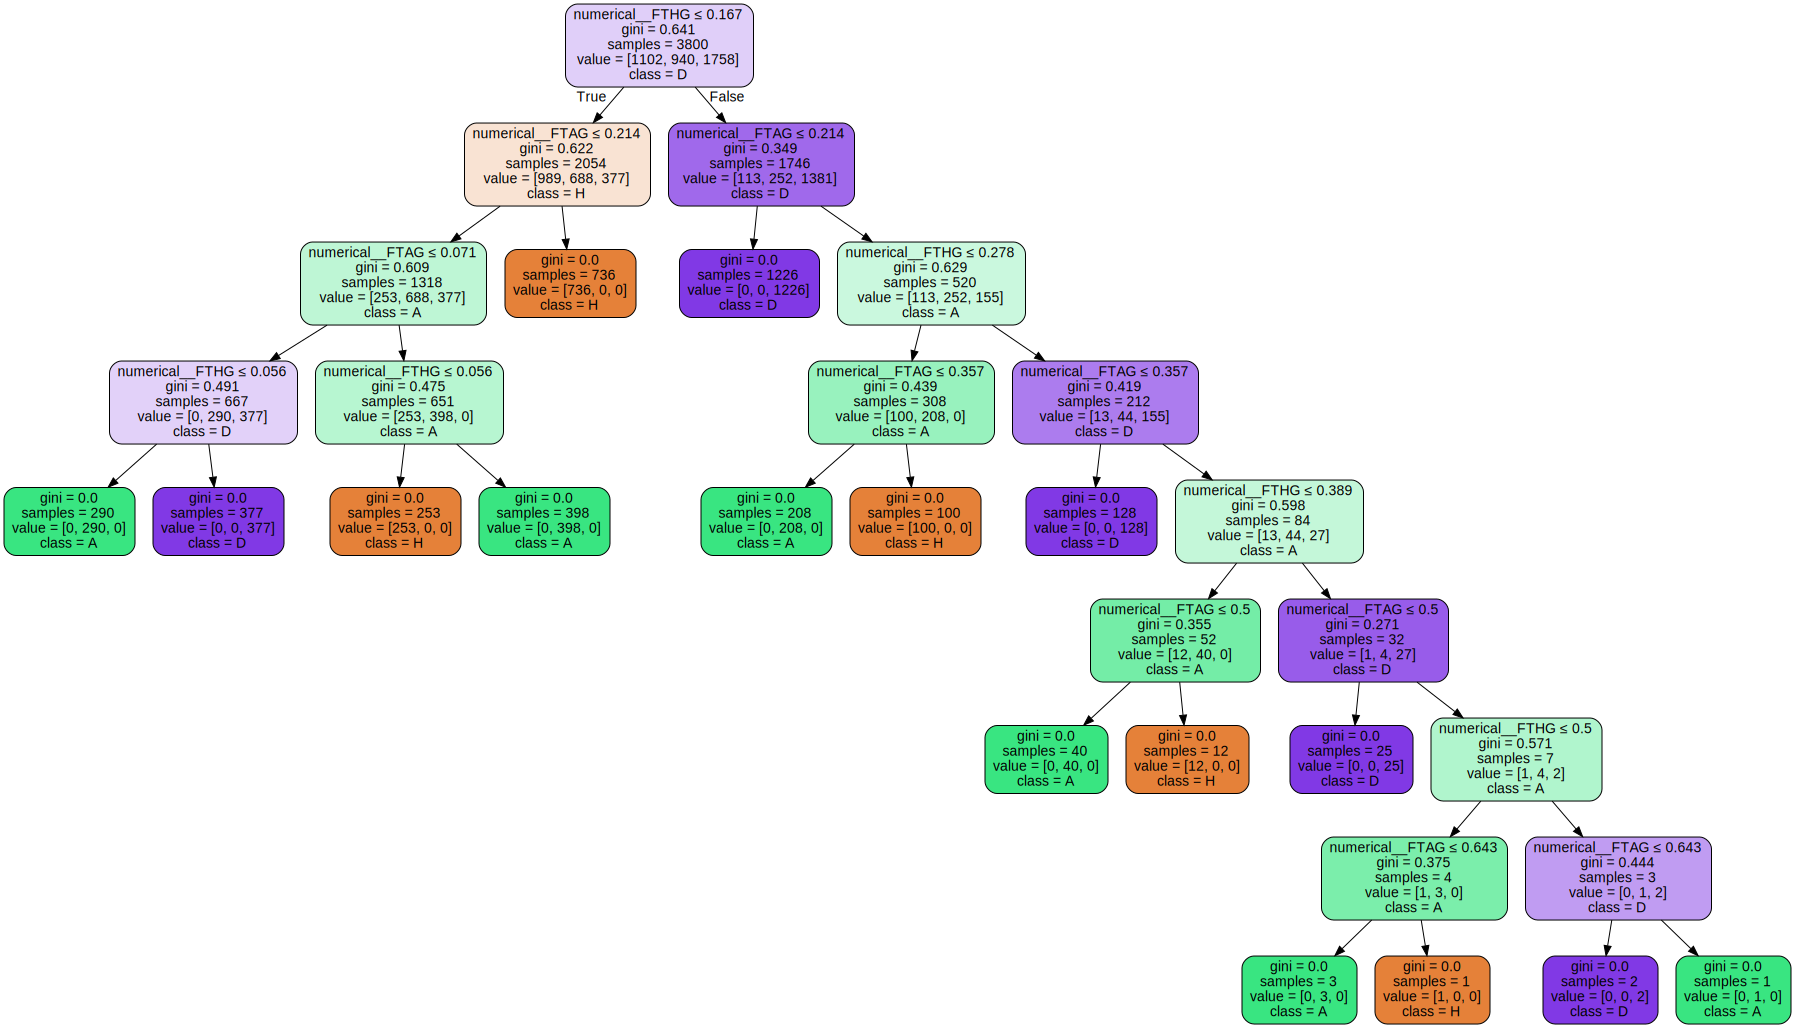

In [96]:
dot_data = tree.export_graphviz(decisionTree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# **Classification**

Implement Muller Loop to run the training dataset against - "KNN Classifier", "NaiveBayes Classifier", "RandomForest Classifier", "XGB Classifier", "DecisionTreeClassifier" and display their accuracy.

In [97]:
#from sklearn.utils.validation import check_is_fitted

names = ["KNN Classifier", "NaiveBayes Classifier", "RandomForest Classifier",
         "XGB Classifier", "DecisionTreeClassifier"]

classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
    ensemble.RandomForestClassifier(),
    XGBClassifier(),
    DecisionTreeClassifier()]

max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append(score)
    clf_list.append(name)
    print('Classification  Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classification Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms


Classification  Classifier = KNN Classifier, Score (test, accuracy) = 98.62, Training time = 0.05 seconds
Classification  Classifier = NaiveBayes Classifier, Score (test, accuracy) = 67.70, Training time = 0.00 seconds
Classification  Classifier = RandomForest Classifier, Score (test, accuracy) = 99.41, Training time = 0.21 seconds
Classification  Classifier = XGB Classifier, Score (test, accuracy) = 100.00, Training time = 0.26 seconds
Classification  Classifier = DecisionTreeClassifier, Score (test, accuracy) = 100.00, Training time = 0.00 seconds
--------------------------------------------------------------------------------
Best --> Classification Classifier = XGB Classifier, Score (test, accuracy) = 100.00


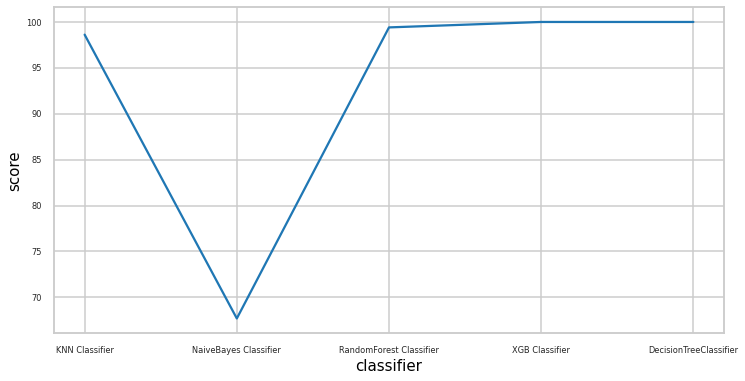

In [98]:
plt.figure(figsize=(12,6))
plt.plot(clf_list,score_list)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black");

## **KFold Technique** 

Implement KFold Technique, to split the training dataset into 3 folds and run the each fold against the give list of classfiers and check the accuracy.

In [99]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    print(80*'*' )
    score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), x_train_fold, y_train_fold, cv= kf, scoring="accuracy")
    print(f'RandomForestClassifier Scores for each fold are: {score}')
    print(f'RandomForestClassifier Average score: {"{:.2f}".format(score.mean())}')
    print(80*'-' )

    score = cross_val_score(GaussianNB(), x_train_fold, y_train_fold, cv= kf, scoring="accuracy")
    print(f'GaussianNB Scores for each fold are: {score}')
    print(f'GaussianNB Average score: {"{:.2f}".format(score.mean())}')
    print(80*'-' )
    score = cross_val_score(XGBClassifier(), x_train_fold, y_train_fold, cv= kf, scoring="accuracy")
    print(f'XGBClassifier Scores for each fold are: {score}')
    print(f'XGBClassifier Average score: {"{:.2f}".format(score.mean())}')

    print(80*'-' )
    score = cross_val_score(KNeighborsClassifier(n_neighbors = 5),x_train_fold, y_train_fold, cv=kf, scoring='accuracy')
    print(f'KNeighborsClassifier Scores for each fold are: {score}')
    print(f'KNeighborsClassifier Average score: {"{:.2f}".format(score.mean())}')

    print(80*'-' )
    score = cross_val_score(DecisionTreeClassifier(),x_train_fold, y_train_fold, cv=kf, scoring='accuracy')
    print(f'DecisionTreeClassifier Scores for each fold are: {score}')
    print(f'DecisionTreeClassifier Average score: {"{:.2f}".format(score.mean())}')

    

********************************************************************************
RandomForestClassifier Scores for each fold are: [0.99526627 0.99170616 0.992891  ]
RandomForestClassifier Average score: 0.99
--------------------------------------------------------------------------------
GaussianNB Scores for each fold are: [0.65680473 0.70734597 0.70616114]
GaussianNB Average score: 0.69
--------------------------------------------------------------------------------
XGBClassifier Scores for each fold are: [1.         0.99763033 0.99763033]
XGBClassifier Average score: 1.00
--------------------------------------------------------------------------------
KNeighborsClassifier Scores for each fold are: [0.98224852 0.97630332 0.98578199]
KNeighborsClassifier Average score: 0.98
--------------------------------------------------------------------------------
DecisionTreeClassifier Scores for each fold are: [1.         0.99881517 0.99881517]
DecisionTreeClassifier Average score: 1.00
******

Gather the output of all the models and finalize one outcome depending on voting.

In [100]:
# Ensemble with basic models

clf_list = [('knn', KNeighborsClassifier()),
            ('naive bayes classifier', GaussianNB()),
            ('random forst classifier', ensemble.RandomForestClassifier()),
            ('XGB Classifier', XGBClassifier())]

In [101]:
voting_clf = VotingClassifier(clf_list, voting='soft')
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)
print(f"Voting Classifier's accuracy: {accuracy_score(y_pred, y_test):.2f}")

Voting Classifier's accuracy: 0.99


Analysing predicted result

In [102]:
pred_result = classification_report(y_test, y_pred)
print(pred_result)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       425
           1       1.00      0.98      0.99       370
           2       1.00      1.00      1.00       725

    accuracy                           0.99      1520
   macro avg       0.99      0.99      0.99      1520
weighted avg       0.99      0.99      0.99      1520



Confusion matrix to analyse the result.

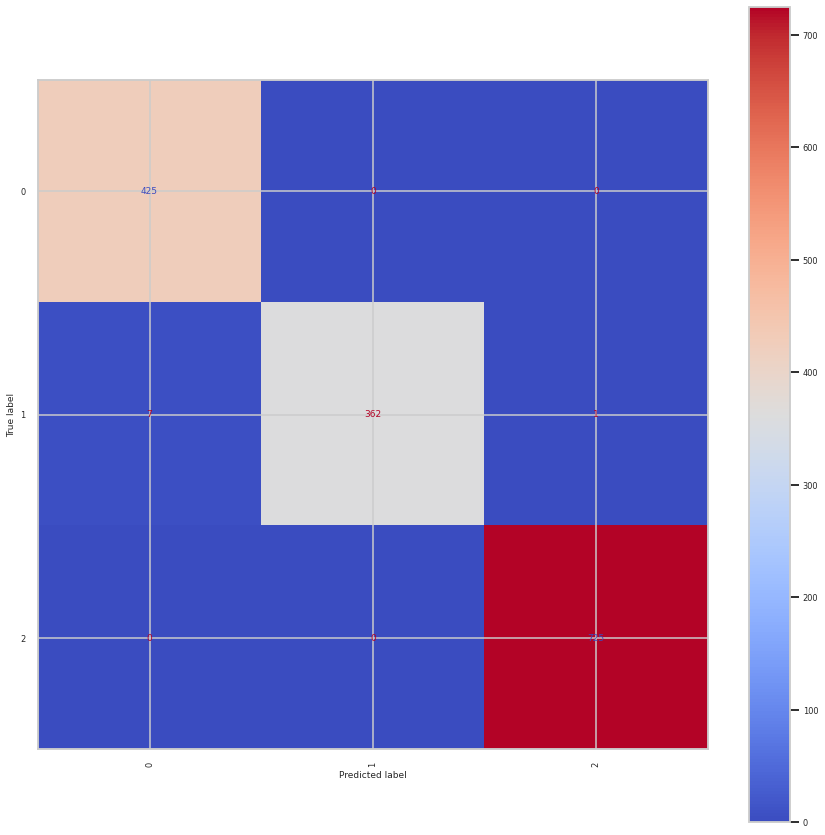

In [103]:
con_matrix = confusion_matrix(y_test, y_pred, labels=voting_clf.classes_)
figure, axes = plt.subplots(1, figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=voting_clf.classes_)
disp.plot(ax = axes, xticks_rotation='vertical',cmap = "coolwarm")